Task: spam/nonspam detection from sms

model: Naive Bayes classification

Dataset: kaggle (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [69]:
import pandas as pd

In [70]:
path = '/content/drive/MyDrive/Colab Notebooks/Machine learning/dataset/spam.csv'
df = pd.read_csv(path, encoding = "ISO-8859-1")

**Initial Data preprocessing**

In [71]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [72]:
# Renaming important columns

df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [73]:
df.head(3)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [74]:
# dropping unimportant columns

df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [75]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


**Data exploration**

In [76]:
# Check spam and ham counts

df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [77]:
# Shape of data

df.shape

(5572, 2)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [79]:
# Null check

df.isnull().sum()

target    0
text      0
dtype: int64

In [80]:
# Duplicate check

df.duplicated().sum()
df[df.duplicated()]

,target,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [81]:
df = df.drop_duplicates(keep='first')

In [82]:
df.duplicated().sum()
df.shape

(5169, 2)

In [83]:
df_perc = (df['target'].value_counts()/len(df)*100).round(2)
df_perc

ham     87.37
spam    12.63
Name: target, dtype: float64

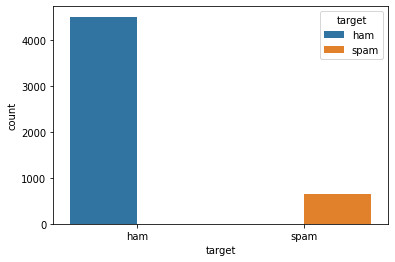

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['target'],hue=df['target'],data=df)
plt.show()

Majority of the texts are ham/nonspam. So the data is imbalanced as ham is 87% and spam is 12%.

In [85]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
# Fetching len of each sms
df['No_of_charecters'] = df['text'].apply(len)


In [87]:
# fetching number of words per sms

df['No_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

df['No_of_word'] = df['text'].apply(lambda x: len(x.split()))

df = df.drop(['No_of_word'],axis=1)


In [88]:
# fetching number of sentences per sms

df['No_of_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,No_of_charecters,No_of_words,No_of_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [89]:
df.head(2)

,target,text,No_of_charecters,No_of_words,No_of_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2


In [90]:
# dividing dataframe based on spam and ham to do better analysis

df_ham = df[df['target'] == 'ham']
df_spam = df[df['target'] == 'spam']

In [91]:
df_ham.describe()

,No_of_charecters,No_of_words,No_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [92]:
df_spam.describe()

,No_of_charecters,No_of_words,No_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


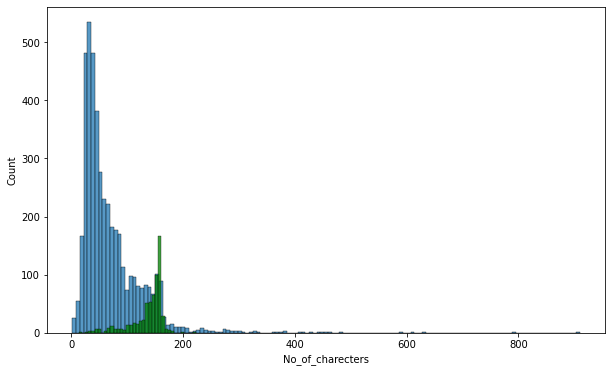

In [93]:
plt.figure(figsize=(10,6))
sns.histplot(df_ham['No_of_charecters'])
sns.histplot(df_spam['No_of_charecters'],color='green')
plt.show()

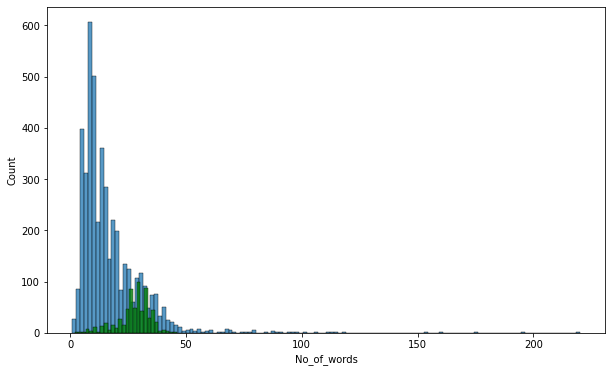

In [94]:
plt.figure(figsize=(10,6))
sns.histplot(df_ham['No_of_words'])
sns.histplot(df_spam['No_of_words'],color='green')
plt.show()

In [95]:
df['target'] = df['target'].map({'spam': 1, 'ham': 0})

In [96]:
df.head()

,target,text,No_of_charecters,No_of_words,No_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


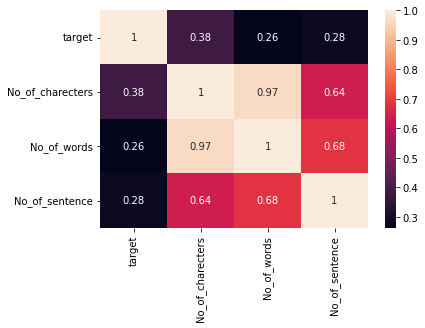

In [97]:
sns.heatmap(df.corr(),annot=True)

high correlation with target and no of charecters, higher the charecters higher is the chance of being a spam.

In [98]:
# finding most common words in ham and spam messages

from collections import Counter

count_ham = Counter(' '.join(df_ham['text']).split()).most_common(20)
df1 = pd.DataFrame(count_ham)
column = ['words','count']
df1.columns = column
count_spam = Counter(' '.join(df_spam['text']).split()).most_common(20)
df2 = pd.DataFrame(count_spam)
df2.columns = column
df2.head()

,words,count
0,to,522
1,a,314
2,your,171
3,call,163
4,the,160


In [99]:
import numpy as np

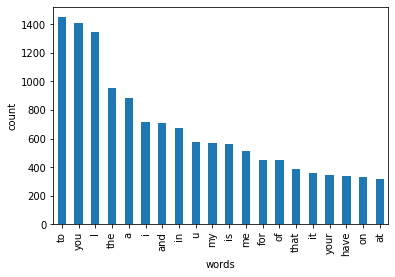

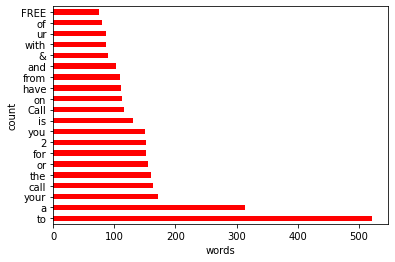

In [100]:
df1.plot(kind='bar',legend=False)
y1 = np.arange(len(df1['words']))
plt.xticks(y1,df1['words'])
plt.xlabel('words')
plt.ylabel('count')
plt.show()

df2.plot(kind='barh',color='red',legend=False)
y2 = np.arange(len(df2['words']))
plt.yticks(y2,df2['words'])
plt.xlabel('words')
plt.ylabel('count')
plt.show()



**Data processing**

In [101]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
def processing(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  filtered_words = [re.sub('[^A-Za-z0-9]+', '', word) for word in text if word not in stopwords.words('english') and word not in string.punctuation]
  ps = PorterStemmer()
  words = [ps.stem(w) for w in filtered_words]
  return ' '.join(words)



In [103]:
processing(df['text'][0])


'go jurong point crazi  avail bugi n great world la e buffet  cine got amor wat '

In [104]:
# Apply precossing function on the dataframe

df['transformed'] = df['text'].apply(lambda x: processing(x))

In [105]:
df.head(4)

,target,text,No_of_charecters,No_of_words,No_of_sentence,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great worl...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [106]:
from wordcloud import WordCloud

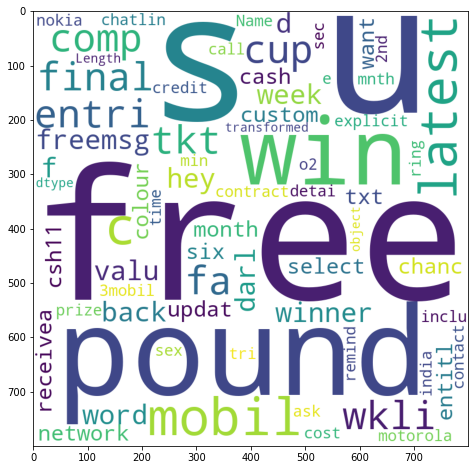

In [107]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(df[df['target']==1]['transformed']))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)

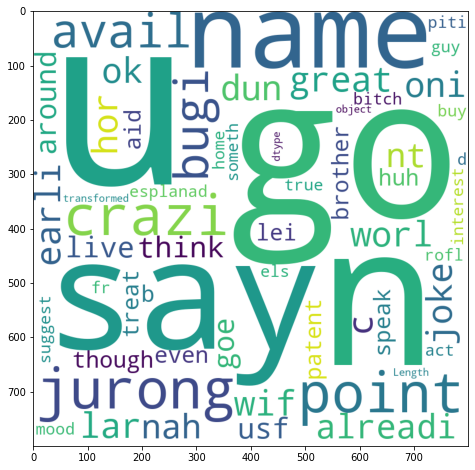

In [108]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(df[df['target']==0]['transformed']))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)

In [109]:
from nltk.probability import FreqDist
corpus = ' '.join(df[df['target']==1]['transformed']).split()
len(corpus)
count_spam = dist = FreqDist(corpus)
df_count_spam  = pd.DataFrame(count_spam.items())
df_count_spam.columns = ['words','count']
df_count_spam_20 = df_count_spam.sort_values(by='count',ascending=False)[:20].reset_index(drop=True)
df_count_spam_20

,words,count
0,call,321
1,free,191
2,2,157
3,txt,141
4,u,135
5,text,122
6,ur,119
7,mobil,114
8,stop,106
9,repli,103


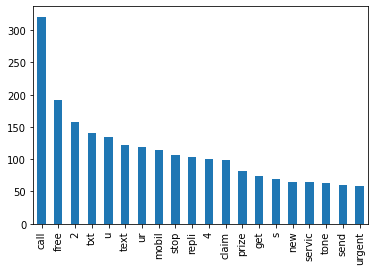

In [110]:
df_count_spam_20.plot(kind='bar',legend=False)
y = np.arange(len(df_count_spam_20['words']))
plt.xticks(y,df_count_spam_20['words'])
plt.show()


**Model Building**

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [112]:
tfidf = TfidfVectorizer()  

x = tfidf.fit_transform(df['transformed']).toarray()

In [113]:
x.shape

(5169, 7589)

In [114]:
y = df['target'].values
y.shape

(5169,)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [116]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3463, 7589) (3463,)
(1706, 7589) (1706,)


In [117]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [118]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [126]:
model = mnb.fit(X_train,y_train)

In [120]:
def accuracy(x,y,obj):
  obj.fit(X_train,y_train)
  pred = obj.predict(x)
  acc = accuracy_score(y,pred)
  pscore = precision_score(y,pred)
  return (acc,pscore)

In [121]:
a,p = accuracy(X_train,y_train,gnb)
print('Train acc and precision gnb:',a,',',p)
print('test acc and p for gnb',accuracy(X_test,y_test,gnb))

Train acc and precision gnb: 0.9373375685821542 , 0.6588050314465409
test acc and p for gnb (0.8833528722157092, 0.5484764542936288)


In [122]:
print('train acc and p for mnb',accuracy(X_train,y_train,mnb))
print('test acc and p for mnb',accuracy(X_test,y_test,mnb))

train acc and p for mnb (0.9659254981230148, 1.0)
test acc and p for mnb (0.9507620164126612, 1.0)


As precision is higher in case of MNB we will use MNB instead of GNB

In [131]:
import pickle
pickle.dump(tfidf,open('vect_1.pickle','wb'))
pickle.dump(model,open('model.pickle','wb'))